In [18]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import requests

pd.set_option('max_colwidth', 800)

# RECOGIDA Y ADAPTACION DE DATOS

Para las hipotesis de la recaudacion y la rentabilidad he obtenido dos bases de datos con informacion sobre películas: una con mucha informacion de casi 5000 peliculas, pero que a simple vista tiene errores y valores vacíos, y otra con informacion contrastada de las 100 peliculas mas populares de cada año, pero que solo abarca desde 2003 a 2022. Y ademas, tres bases de datos con la informacion financiera de 15000, 8000 y 600 películas.

In [19]:
mov322= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/100movies322.csv"

movies322= pd.read_csv(mov322)
movies322.columns

Index(['Title', 'IMDB Rating', 'Year', 'Month', 'Certificate', 'Runtime',
       'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin'],
      dtype='object')

In [20]:
movies322.drop(columns=['Month','Directors','Stars','Filming_location'],inplace=True)

In [21]:
movie= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/movies.csv"
movies= pd.read_csv(movie)


In [22]:
movies.drop(columns=['genres','homepage','id','keywords','original_language','overview','popularity','production_companies','production_countries','spoken_languages','status','tagline','vote_average', 'vote_count','cast','crew','director'],inplace=True)
movies.columns

Index(['index', 'budget', 'original_title', 'release_date', 'revenue',
       'runtime', 'title'],
      dtype='object')

In [23]:
movies[movies['original_title']!=movies['title']]

,index,budget,original_title,release_date,revenue,runtime,title
97,97,15000000,シン・ゴジラ,2016-07-29,77000000,120.0,Shin Godzilla
215,215,130000000,4: Rise of the Silver Surfer,2007-06-13,289047763,92.0,Fantastic 4: Rise of the Silver Surfer
235,235,97250400,Astérix aux Jeux Olympiques,2008-01-13,132900000,116.0,Asterix at the Olympic Games
317,317,94000000,金陵十三釵,2011-12-15,95311434,145.0,The Flowers of War
474,474,0,Évolution,2015-09-14,0,81.0,Evolution
...,...,...,...,...,...,...,...
4698,4699,0,Lumea e a mea,2015-06-05,0,104.0,The World Is Mine
4718,4719,120000,Une femme mariée: Suite de fragments d'un film tourné en 1964,1964-12-04,0,95.0,The Married Woman
4750,4751,0,"Gabriela, Cravo e Canela",1983-03-24,0,99.0,Gabriela
4789,4790,0,دایره,2000-09-08,0,90.0,The Circle


Veo que el original title es el titulo en el idioma de producción, por lo que para el estudio solo me interesa el titulo en inglés, que coincide en su mayoria con el original. Lo siguiente es quedarme solo con el año en la fecha de estreno.

In [24]:
movies.drop(columns=['original_title'],inplace=True)

In [25]:
movies.rename(columns={'release_date':'Year'},inplace=True)
movies.rename(columns={'title':'Title'},inplace=True)
movies['Year'] = movies['Year'].apply(lambda x: str(x).split('-')[0])
movies['Year']=movies['Year'].astype(float)

In [26]:
boxo= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/boxoffice.csv"
boxgross= pd.read_csv(boxo)
boxgross.columns


Index(['rank', 'title', 'studio', 'lifetime_gross', 'year'], dtype='object')

In [67]:
boxgross.rename(columns={'title':'Title'},inplace=True)
boxgross.rename(columns={'year':'Year'},inplace=True)
boxgross.columns
boxgross.shape

(15743, 5)

In [28]:
boxoff= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/boxoffice2024.csv"
boxoffice= pd.read_csv(boxoff)
boxoffice.columns

Index(['Year', 'Title', 'Gross'], dtype='object')

In [29]:
alltimebox= "/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/AllTime_BO.csv"
allbox= pd.read_csv(alltimebox)
allbox.head()

,Rank,Year,Movie,WorldwideBox Office,DomesticBox Office,InternationalBox Office
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041"


In [30]:
allbox.drop(columns={'DomesticBox Office','InternationalBox Office'},inplace=True)
allbox.rename(columns={'Movie':'Title'}, inplace=True)

In [31]:
boxcol="/Users/juanzubiaga/Desktop/BOOTCAMPDS/1-Local/EDA/J-EDA/Box Ofice Collection.csv"
boxcollection=pd.read_csv(boxcol)
boxcollection

,Year Rank,Title,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year
0,0,Mission: Impossible II,"54,63,88,108","21,54,09,889",39.40%,"33,09,78,219",60.60%,2000
1,1,Gladiator,"46,05,83,960","18,77,05,427",40.80%,"27,28,78,533",59.20%,2000
2,2,Cast Away,"42,96,32,142","23,36,32,142",54.40%,"19,60,00,000",45.60%,2000
3,3,What Women Want,"37,41,11,707","18,28,11,707",48.90%,"19,13,00,000",51.10%,2000
4,4,Dinosaur,"34,98,22,765","13,77,48,063",39.40%,"21,20,74,702",60.60%,2000
...,...,...,...,...,...,...,...,...
4995,195,Buzz House: The Movie,"29,10,112",0,0,"29,10,112",100%,2024
4996,196,We 12,"28,64,154",0,0,"28,64,154",100%,2024
4997,197,Me Contro Te - Il film: Operazione Spie,"27,98,501",0,0,"27,98,501",100%,2024
4998,198,Menudas piezas,"27,78,043",0,0,"27,78,043",100%,2024


# LIMPIEZA

In [32]:
movies322.isnull().sum()

Title                 0
IMDB Rating           1
Year                  0
Certificate          34
Runtime               0
Genre                 0
Budget                0
Income                1
Country_of_origin     0
dtype: int64

In [33]:
movies322[movies322['IMDB Rating'].isnull()]

,Title,IMDB Rating,Year,Certificate,Runtime,Genre,Budget,Income,Country_of_origin
85,A Man Called Otto,NaN,2022,PG-13,126,"Comedy, Drama",Unknown,Unknown,"Sweden, United States"


Para encontrar el rating de la película que falta, que me servirá mas adelante, podría buscarlo en internet pero voy a tratar de obtenerlo con webscrapping.

In [34]:
from fake_useragent import UserAgent
ua= UserAgent()
headers = {'User-Agent': ua.random}

In [35]:
url= "https://www.imdb.com/es-es/title/tt7405458/"
response = requests.get(url, headers=headers)
print(response)
html=response.content
soup = bs(html, 'html.parser')

<Response [200]>


In [36]:
soup.title

<title>El peor vecino del mundo (2022) - IMDb</title>

In [37]:
ottorating= soup.findAll('span',class_='sc-d541859f-1 imUuxf')
ottorating[0].text

'7,5'

In [38]:
movies322['IMDB Rating']=movies322['IMDB Rating'].fillna(ottorating[0].text)

In [39]:
movies322.loc[85]

Title                    A Man Called Otto
IMDB Rating                            7,5
Year                                  2022
Certificate                          PG-13
Runtime                                126
Genre                        Comedy, Drama
Budget                             Unknown
Income                             Unknown
Country_of_origin    Sweden, United States
Name: 85, dtype: object

In [40]:
movies322.isnull().sum()

Title                 0
IMDB Rating           0
Year                  0
Certificate          34
Runtime               0
Genre                 0
Budget                0
Income                1
Country_of_origin     0
dtype: int64

In [41]:
movies322[(movies322['Budget']=='Unknown')|(movies322['Income']=='Unknown')].value_counts().sum()

np.int64(319)

In [42]:
movies322.head()

,Title,IMDB Rating,Year,Certificate,Runtime,Genre,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,PG-13,192,"Action, Adventure, Fantasy","$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,PG,117,"Animation, Drama, Family","$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,R,127,"Action, Comedy, Thriller","$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,R,114,"Comedy, Drama",Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,PG-13,102,"Horror, Sci-Fi, Thriller","$12,000,000","$171,253,910",United States


In [43]:
movies322['Budget']=movies322['Budget'].replace('Unknown',pd.NA)
movies322['Budget']=movies322['Budget'].str.replace('[$,]','',regex=True).str.strip()
movies322['Budget']=pd.to_numeric(movies322['Budget'],errors='coerce')
movies322['Budget'].median()

np.float64(40000000.0)

In [44]:
movies322['Income']=movies322['Income'].replace('Unknown',pd.NA)
movies322['Income']=movies322['Income'].str.replace('[$,]','',regex=True).str.strip()
movies322['Income']=pd.to_numeric(movies322['Income'],errors='coerce')
movies322['Income'].median()

np.float64(90842646.0)

In [45]:
Q1 = movies322['Budget'].quantile(0.25)
Q3 = movies322['Budget'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
boutliers = movies322[(movies322['Budget'] < lower_bound) | (movies322['Budget'] > upper_bound)]
boutliers.describe()

,Year,Budget,Income
count,82.000000,8.200000e+01,8.100000e+01
mean,2014.524390,2.274024e+08,8.475358e+08
std,5.169296,3.717156e+07,5.609238e+08
min,2003.000000,2.000000e+08,4.540230e+05
25%,2010.000000,2.000000e+08,4.333711e+08
50%,2014.500000,2.080000e+08,7.609281e+08
75%,2019.000000,2.500000e+08,1.066971e+09
max,2022.000000,3.560000e+08,2.922918e+09


<Axes: ylabel='Budget'>

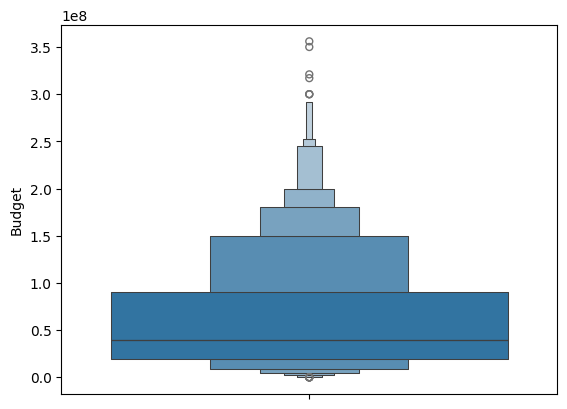

In [46]:
sns.boxenplot(movies322['Budget'])

In [47]:
movies322[(movies322['Budget']>300000000)|(movies322['Budget']<20000)].sort_values('Budget')

,Title,IMDB Rating,Year,Certificate,Runtime,Genre,Budget,Income,Country_of_origin
1249,My Little Princess,3.2,2010,NaN,Unknown,"Romance, Drama, Family",10.0,NaN,United States
1863,Primer,6.8,2004,PG-13,77,"Drama, Sci-Fi, Thriller",7000.0,5.454360e+05,United States
477,The VelociPastor,5.0,2018,Not Rated,75,"Action, Adventure, Comedy",11000.0,NaN,"United States, China"
1557,Paranormal Activity,6.3,2007,R,86,"Horror, Mystery",15000.0,1.933558e+08,United States
521,Star Wars: Episode VIII - The Last Jedi,6.9,2017,PG-13,152,"Action, Adventure, Fantasy",317000000.0,1.332699e+09,United States
405,Avengers: Infinity War,8.4,2018,PG-13,149,"Action, Adventure, Sci-Fi",321000000.0,2.048360e+09,United States
0,Avatar: The Way of Water,7.8,2022,PG-13,192,"Action, Adventure, Fantasy",350000000.0,2.267947e+09,United States
305,Avengers: Endgame,8.4,2019,PG-13,181,"Action, Adventure, Drama",356000000.0,2.797501e+09,United States


In [48]:
Q1 = movies322['Income'].quantile(0.25)
Q3 = movies322['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
ioutliers = movies322[(movies322['Income'] < lower_bound) | (movies322['Income'] > upper_bound)]
ioutliers.describe()

,Year,Budget,Income
count,180.000000,1.790000e+02,1.800000e+02
mean,2012.950000,1.652726e+08,8.741012e+08
std,4.823447,6.168396e+07,3.759576e+08
min,2003.000000,3.000000e+07,5.193120e+08
25%,2009.750000,1.275000e+08,6.303265e+08
50%,2013.500000,1.650000e+08,7.720932e+08
75%,2017.000000,2.000000e+08,9.967884e+08
max,2022.000000,3.560000e+08,2.922918e+09


<Axes: ylabel='Income'>

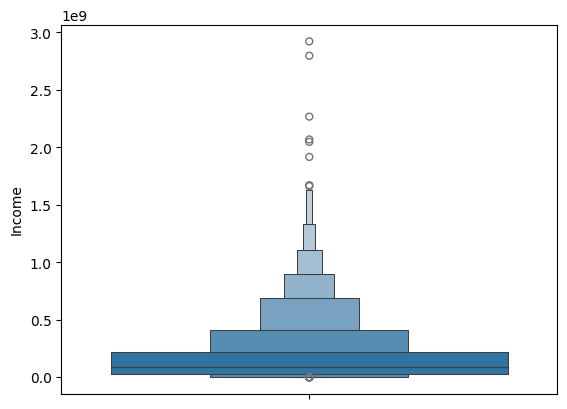

In [49]:
sns.boxenplot(movies322['Income'])

In [50]:
movies322[(movies322['Income']>2000000000)|(movies322['Income']<11000)].sort_values('Income')

,Title,IMDB Rating,Year,Certificate,Runtime,Genre,Budget,Income,Country_of_origin
396,"Yes, God, Yes",6.1,2019,R,78,"Comedy, Drama",NaN,3.050000e+02,United States
101,Farha,8.4,2021,TV-14,92,Drama,NaN,7.030000e+02,"Jordan, Saudi Arabia, Sweden"
1203,A Serbian Film,5.0,2010,NC-17,104,"Horror, Mystery, Thriller",NaN,1.541000e+03,Serbia
1176,Now & Later,5.1,2011,Unrated,99,Drama,NaN,1.808000e+03,United States
1366,Blood and Bone,6.7,2009,R,93,"Action, Crime, Drama",3700000.0,3.492000e+03,United States
151,Father Christmas Is Back,4.5,2021,PG-13,105,Comedy,NaN,5.751000e+03,United Kingdom
1785,Noroi,6.9,2005,Not Rated,115,"Horror, Mystery, Thriller",2000000.0,6.819000e+03,Japan
262,What We Found,5.4,2020,Not Rated,110,Thriller,NaN,6.976000e+03,United States
1720,Santa's Slay,5.3,2005,R,78,"Comedy, Fantasy, Horror",NaN,6.982000e+03,"United States, Canada"
167,The Harder They Fall,6.6,2021,R,139,"Action, Drama, Western",NaN,8.292000e+03,United States


Una vez comprobados los datos de presupuesto y recaudacion de la base principal que voy a estudiar, veo que, aparte de los NaNs, no hay ningun valor atípico (mas allá de las peliculas mas caras y las que han tenido recaudaciones record, y las peliculas de producción 'casera' y poco conocidas).

In [51]:
movies322b=movies322[['Title','Budget','Income','Year','Certificate']]
boxgrossb=boxgross[['Title','lifetime_gross','Year']]
moviesgross=pd.merge(movies322b,boxgrossb, on='Title', how='left')
moviesgross.iloc[619:630]

,Title,Budget,Income,Year_x,Certificate,lifetime_gross,Year_y
619,Me Before You,20000000.0,2.083142e+08,2016,PG-13,56245075.0,2016.0
620,The Nice Guys,50000000.0,6.278822e+07,2016,R,36261763.0,2016.0
621,Sing,75000000.0,6.343384e+08,2016,PG,270395425.0,2016.0
622,Sing,75000000.0,6.343384e+08,2016,PG,2260616.0,1989.0
623,Bad Moms,20000000.0,1.839361e+08,2016,R,113257297.0,2016.0
624,Zootopia,150000000.0,1.042534e+09,2016,PG,341268248.0,2016.0
625,Hell or High Water,12000000.0,3.799968e+07,2016,R,27007844.0,2016.0
626,Sausage Party,19000000.0,1.407053e+08,2016,R,97685686.0,2016.0
627,Manchester by the Sea,9000000.0,7.898815e+07,2016,R,47695371.0,2016.0
628,Batman v Superman: Dawn of Justice,250000000.0,8.736375e+08,2016,PG-13,330360194.0,2016.0


He probado si la base de datos de boxgross es fiable (si los valores de filas aleatorias se acercan a la otra que es obtenida de IMDB y he comprobado que es fiable), y los datos no se acercan ni un poco, asi que voy a probar con otra. Además, veo que me duplica algunos titulos, aumentando el tamaño de la tabla, asi que debo combinarlas con titulo y año para que evitar esto, pues hay peliculas que se llaman igual pero no salieron el mismo año.

In [52]:
movies.columns

Index(['index', 'budget', 'Year', 'revenue', 'runtime', 'Title'], dtype='object')

In [53]:
moviesb=movies[['Title','Year','budget','revenue','runtime']]
moviesmovies=pd.merge(movies322b,moviesb, on=['Title','Year'],how='left')
moviesmovies.tail()

,Title,Budget,Income,Year,Certificate,budget,revenue,runtime
1995,A Tale of Two Sisters,NaN,1062878.0,2003,R,NaN,NaN,NaN
1996,Lara Croft Tomb Raider: The Cradle of Life,95000000.0,160099222.0,2003,PG-13,95000000.0,156505388.0,117.0
1997,Gothika,40000000.0,141591324.0,2003,R,40000000.0,141591324.0,98.0
1998,Ong-Bak: The Thai Warrior,NaN,20235426.0,2003,R,NaN,NaN,NaN
1999,Open Water,500000.0,54683487.0,2003,R,NaN,NaN,NaN


In [54]:
moviesmovies[moviesmovies['revenue'].notnull()]

,Title,Budget,Income,Year,Certificate,budget,revenue,runtime
602,Zoolander 2,50000000.0,56722693.0,2016,PG-13,50000000.0,55969000.0,100.0
610,Suicide Squad,175000000.0,746846894.0,2016,PG-13,175000000.0,745000000.0,123.0
611,Deadpool,58000000.0,782836791.0,2016,R,58000000.0,783112979.0,108.0
614,Me Before You,20000000.0,208314186.0,2016,PG-13,20000000.0,207945075.0,110.0
617,Bad Moms,20000000.0,183936074.0,2016,R,20000000.0,183936074.0,100.0
...,...,...,...,...,...,...,...,...
1989,Jeepers Creepers 2,17000000.0,63102666.0,2003,R,17000000.0,63102666.0,104.0
1993,House of Sand and Fog,16500000.0,16763804.0,2003,R,16500000.0,16942795.0,126.0
1994,In the Cut,12000000.0,23726793.0,2003,R,12000000.0,23.0,119.0
1996,Lara Croft Tomb Raider: The Cradle of Life,95000000.0,160099222.0,2003,PG-13,95000000.0,156505388.0,117.0


Al combinarla con el DS mas grande que tengo, que tiene 5000 peliculas pero solo hasta 2016 veo que, de las que tiene, la informacion de revenue se acerca bastante a la de Income de la otra DS, por lo que voy a usar esta para rellenar la mayoria de valores de Income vacios.


In [55]:
print(moviesmovies['Income'].isnull().sum())
print(moviesmovies['Budget'].isnull().sum())

145
379


In [56]:
moviesmovies['Income']=moviesmovies['Income'].fillna(moviesmovies['revenue'])
moviesmovies['Budget']=moviesmovies['Budget'].fillna(moviesmovies['budget'])
moviesmovies.columns

Index(['Title', 'Budget', 'Income', 'Year', 'Certificate', 'budget', 'revenue',
       'runtime'],
      dtype='object')

In [57]:
print(moviesmovies['Income'].isnull().sum())
print(moviesmovies['Budget'].isnull().sum())

141
342


Se ve que voy a necesitar otra ds para rellenarlo

In [58]:
moviesmovies.drop(columns={'budget','revenue'},inplace=True)
moviesmovies.rename(columns={'runtime':'Runtime'},inplace=True)
moviesmovies=moviesmovies[['Title','Year','Runtime','Budget','Income','Certificate']]

In [59]:
boxoffice.columns

Index(['Year', 'Title', 'Gross'], dtype='object')

In [60]:
moviesmovies=pd.merge(moviesmovies,boxoffice,on=['Title','Year'],how='left')
moviesmovies

,Title,Year,Runtime,Budget,Income,Certificate,Gross
0,Avatar: The Way of Water,2022,NaN,350000000.0,2.267947e+09,PG-13,"$2,320,250,281"
1,Guillermo del Toro's Pinocchio,2022,NaN,35000000.0,1.089670e+05,PG,NaN
2,Bullet Train,2022,NaN,85900000.0,2.392686e+08,R,"$239,268,602"
3,The Banshees of Inisherin,2022,NaN,NaN,1.972082e+07,R,"$49,262,687"
4,M3gan,2022,NaN,12000000.0,1.712539e+08,PG-13,NaN
...,...,...,...,...,...,...,...
1995,A Tale of Two Sisters,2003,NaN,NaN,1.062878e+06,R,NaN
1996,Lara Croft Tomb Raider: The Cradle of Life,2003,117.0,95000000.0,1.600992e+08,PG-13,NaN
1997,Gothika,2003,98.0,40000000.0,1.415913e+08,R,"$141,591,324"
1998,Ong-Bak: The Thai Warrior,2003,NaN,NaN,2.023543e+07,R,"$20,235,426"


Aqui veo que los valores se parecen mucho mas en la mayoria de películas, asi que voy a rellenar mas NaNs con esta tabla


In [61]:
moviesmovies['Income']=moviesmovies['Income'].fillna(moviesmovies['Gross'])
moviesmovies.drop(columns={'Gross'},inplace=True)
moviesmovies['Income'].isnull().sum()


np.int64(139)

In [62]:
moviesmovies=pd.merge(moviesmovies,allbox,on=['Title','Year'], how='left')
moviesmovies[moviesmovies['WorldwideBox Office'].notnull()]

,Title,Year,Runtime,Budget,Income,Certificate,Rank,WorldwideBox Office
132,Black Widow,2021,NaN,200000000.0,379751655.0,PG-13,395.0,"$352,277,006"
134,F9: The Fast Saga,2021,NaN,200000000.0,726229501.0,PG-13,135.0,"$662,412,771"
160,Godzilla vs. Kong,2021,NaN,200000000.0,470067014.0,PG-13,245.0,"$467,863,133"
202,Tenet,2020,NaN,205000000.0,365294355.0,PG-13,372.0,"$361,875,852"
300,Knives Out,2019,NaN,40000000.0,312897920.0,PG-13,467.0,"$312,952,178"
...,...,...,...,...,...,...,...,...
1936,Terminator 3: Rise of the Machines,2003,109.0,200000000.0,433371112.0,R,278.0,"$433,058,296"
1937,The Matrix Reloaded,2003,138.0,150000000.0,741847937.0,R,112.0,"$738,576,929"
1946,Something's Gotta Give,2003,128.0,80000000.0,265328738.0,PG-13,576.0,"$266,685,242"
1947,Bad Boys II,2003,147.0,130000000.0,273339556.0,R,560.0,"$273,271,982"


Es extraño que en algunas peliculas el Income de la original es es ligeramente mayor a los de la otra dataset y en otras ligeramente menor, pero se asemejan lo suficiente como para fiarme y rellenar mas NaNs.

In [63]:
moviesmovies['Income']=moviesmovies['Income'].fillna(moviesmovies['WorldwideBox Office'])
moviesmovies.drop(columns={'WorldwideBox Office'},inplace=True)
moviesmovies['Income'].isnull().sum()

np.int64(139)

In [64]:
moviesmovies[moviesmovies['Income'].isnull()]

,Title,Year,Runtime,Budget,Income,Certificate,Rank
5,Emancipation,2022,NaN,120000000.0,NaN,R,NaN
15,Spirited,2022,NaN,100000000.0,NaN,PG-13,NaN
16,Lady Chatterley's Lover,2022,NaN,NaN,NaN,R,NaN
17,A Christmas Story Christmas,2022,NaN,NaN,NaN,PG,NaN
18,Troll,2022,NaN,NaN,NaN,TV-14,NaN
...,...,...,...,...,...,...,...
1386,The Scouting Book for Boys,2009,NaN,NaN,NaN,NaN,NaN
1516,The Girl Next Door,2007,NaN,NaN,NaN,R,NaN
1550,The Poughkeepsie Tapes,2007,NaN,NaN,NaN,R,NaN
1742,Monamour,2005,NaN,NaN,NaN,NaN,NaN


AAAAAAAAAAAAAAAAA
Bueno tras combinarla con tres ds diferentes sigo teniendo valores vacios, asi que voy a intentar combinarlo con una que incluye valores de 5000 peliculas, y si no lo completo descartaré los vacíos.

In [65]:
boxcollection.drop(columns={'Domestic','Domestic_percent','Foreign','Foreign_percent'},inplace=True)
boxcollection.rename(columns={'year':'Year'},inplace=True)
boxcollection

,Year Rank,Title,Worldwide,Year
0,0,Mission: Impossible II,"54,63,88,108",2000
1,1,Gladiator,"46,05,83,960",2000
2,2,Cast Away,"42,96,32,142",2000
3,3,What Women Want,"37,41,11,707",2000
4,4,Dinosaur,"34,98,22,765",2000
...,...,...,...,...
4995,195,Buzz House: The Movie,"29,10,112",2024
4996,196,We 12,"28,64,154",2024
4997,197,Me Contro Te - Il film: Operazione Spie,"27,98,501",2024
4998,198,Menudas piezas,"27,78,043",2024


In [66]:
moviesmovies=pd.merge(moviesmovies,boxcollection,on=['Title','Year'],how='left')
moviesmovies[moviesmovies['Income'].isnull()]

,Title,Year,Runtime,Budget,Income,Certificate,Rank,Year Rank,Worldwide
5,Emancipation,2022,NaN,120000000.0,NaN,R,NaN,NaN,NaN
15,Spirited,2022,NaN,100000000.0,NaN,PG-13,NaN,NaN,NaN
16,Lady Chatterley's Lover,2022,NaN,NaN,NaN,R,NaN,NaN,NaN
17,A Christmas Story Christmas,2022,NaN,NaN,NaN,PG,NaN,NaN,NaN
18,Troll,2022,NaN,NaN,NaN,TV-14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1386,The Scouting Book for Boys,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,The Girl Next Door,2007,NaN,NaN,NaN,R,NaN,NaN,NaN
1550,The Poughkeepsie Tapes,2007,NaN,NaN,NaN,R,NaN,NaN,NaN
1742,Monamour,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1736]:
moviesmovies['Income']=moviesmovies['Income'].fillna(moviesmovies['Worldwide'])
moviesmovies.drop(columns={'Year Rank','Worldwide'},inplace=True)
moviesmovies['Income'].isnull().sum()

np.int64(139)

In [ ]:
moviesmovies['Income']=moviesmovies['Income'].fillna(moviesmovies['Worldwide'])
moviesmovies.drop(columns={'Year Rank','Worldwide'},inplace=True)
moviesmovies['Income'].isnull().sum()

np.int64(139)